Graph has 1174 nodes and 1417 edges.


/tmp/ipykernel_5028/359387247.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  edges_df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["node1", "node2"])


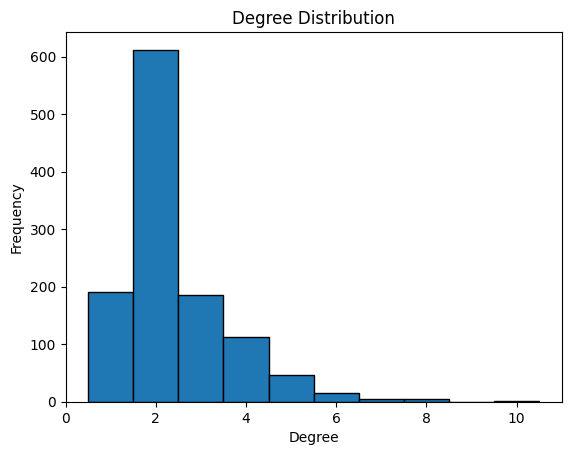

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def create_graph_from_file(file_path):
    edges_df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["node1", "node2"])
    G = nx.from_pandas_edgelist(edges_df, source="node1", target="node2")
    return G

def plot_degree_distribution(G):
    degrees = [deg for _, deg in G.degree()]
    plt.hist(degrees, bins=range(1, max(degrees) + 2), align='left', edgecolor='black')
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

file_path = "data1_edges.txt"
G = create_graph_from_file(file_path)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


plot_degree_distribution(G)

/tmp/ipykernel_5028/359387247.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  edges_df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["node1", "node2"])
/tmp/ipykernel_5028/359387247.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  edges_df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["node1", "node2"])


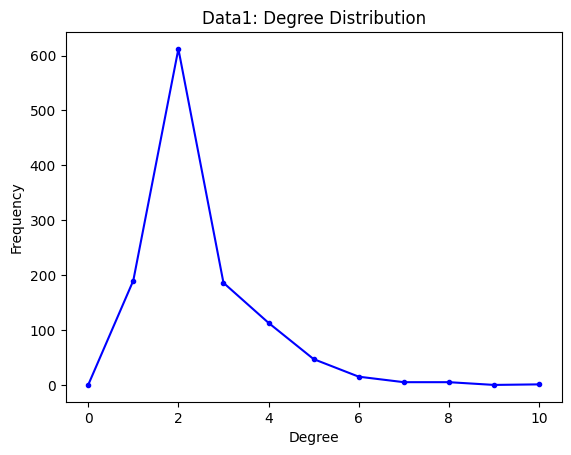

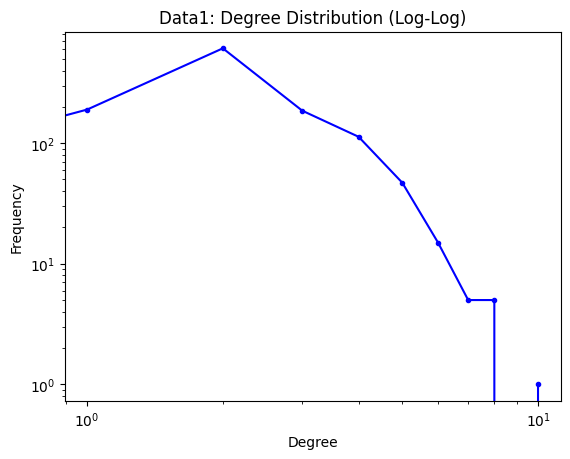

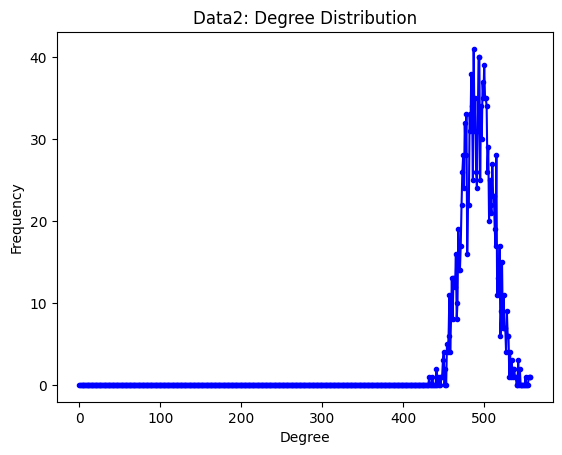

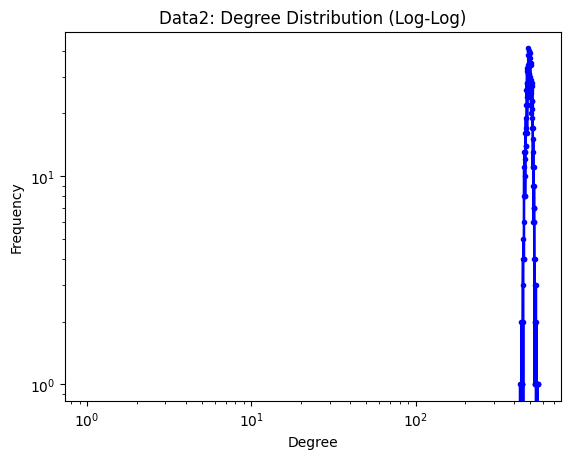

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_degree_distribution(graph, title, log_scale=False):
    degrees = [d for _, d in graph.degree()]
    degree_counts = np.bincount(degrees)
    degree_range = range(len(degree_counts))
    
    plt.figure()
    plt.plot(degree_range, degree_counts, 'bo-', markersize=3)
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    if log_scale:
        plt.xscale("log")
        plt.yscale("log")
    plt.show()

data1_graph = create_graph_from_file('data1_edges.txt')
data2_graph = create_graph_from_file('data2_edges.txt')

plot_degree_distribution(data1_graph, "Data1: Degree Distribution", log_scale=False)
plot_degree_distribution(data1_graph, "Data1: Degree Distribution (Log-Log)", log_scale=True)

plot_degree_distribution(data2_graph, "Data2: Degree Distribution", log_scale=False)
plot_degree_distribution(data2_graph, "Data2: Degree Distribution (Log-Log)", log_scale=True)


In [40]:
from scipy.stats import linregress

def estimate_gamma(k, pk):
    valid = (k > 0) & (pk > 0)
    log_k = np.log(k[valid])
    log_pk = np.log(pk[valid])
    
    slope, intercept, r_value, p_value, std_err = linregress(log_k, log_pk)
    gamma = -slope
    return gamma, slope, intercept, r_value

def compute_degree_distribution(graph):
    degrees = [d for _, d in graph.degree()]
    degree_counts = np.bincount(degrees)
    k = np.arange(len(degree_counts))
    pk = degree_counts / np.sum(degree_counts)
    return k, pk

In [41]:
k, pk = compute_degree_distribution(data1_graph)
print(k)
print(pk)

[ 0  1  2  3  4  5  6  7  8  9 10]
[0.         0.16183986 0.52129472 0.15843271 0.09625213 0.04003407
 0.01277683 0.00425894 0.00425894 0.         0.00085179]


Estimated gamma: 2.49
R-squared value of fit: 0.7410


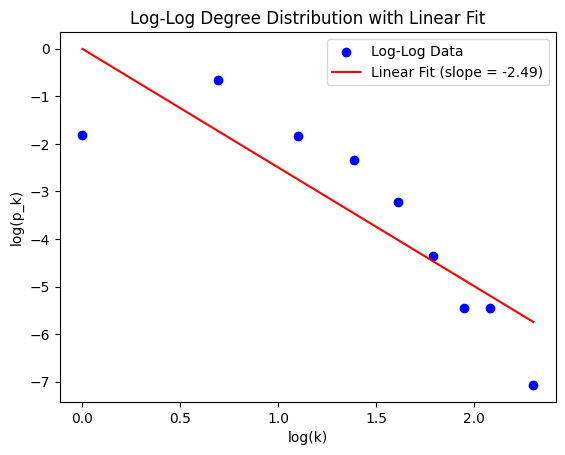

In [42]:
gamma, slope, intercept, r_value = estimate_gamma(k, pk)

print(f"Estimated gamma: {gamma:.2f}")
print(f"R-squared value of fit: {r_value**2:.4f}")

plt.figure()
valid = (k > 0) & (pk > 0)
log_k = np.log(k[valid])
log_pk = np.log(pk[valid])
plt.scatter(log_k, log_pk, color='blue', label='Log-Log Data')
plt.plot(log_k, slope * log_k + intercept, color='red', label=f'Linear Fit (slope = {slope:.2f})')
plt.xlabel("log(k)")
plt.ylabel("log(p_k)")
plt.title("Log-Log Degree Distribution with Linear Fit")
plt.legend()
plt.show()

In [ ]:
def log_binning(k, pk, bins=10):
    max_k = int(np.max(k))
    bin_edges = np.logspace(0, np.log2(max_k), bins, base=2)
    bin_indices = np.digitize(k, bin_edges) - 1
    
    binned_k = []
    binned_pk = []
    for i in range(len(bin_edges) - 1):
        in_bin = (bin_indices == i)
        if np.sum(in_bin) > 0:
            avg_k = np.mean(k[in_bin])
            avg_pk = np.sum(pk[in_bin])
            binned_k.append(avg_k)
            binned_pk.append(avg_pk)
    return np.array(binned_k), np.array(binned_pk)

def estimate_gamma_log_binning(binned_k, binned_pk):
    valid = (binned_k > 0) & (binned_pk > 0)
    log_k = np.log(binned_k[valid])
    log_pk = np.log(binned_pk[valid])
    slope, intercept, r_value, p_value, std_err = linregress(log_k, log_pk)
    gamma = -slope 
    return gamma, slope, intercept, r_value

Estimated gamma with log binning: 1.80
R-squared value of fit: 0.6738


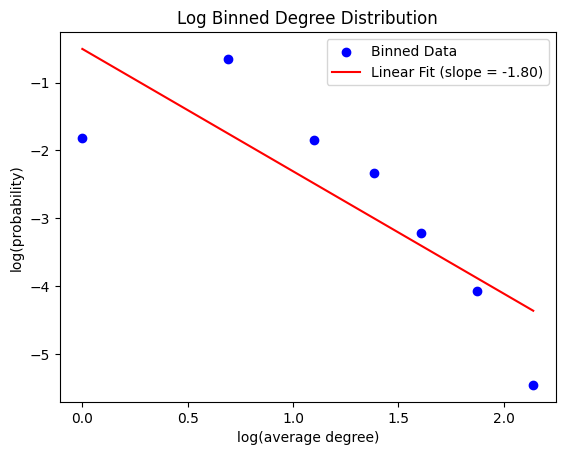

In [ ]:
k, pk = compute_degree_distribution(data1_graph)
binned_k, binned_pk = log_binning(k, pk)
gamma, slope, intercept, r_value = estimate_gamma_log_binning(binned_k, binned_pk)

print(f"Estimated gamma with log binning: {gamma:.2f}")
print(f"R-squared value of fit: {r_value**2:.4f}")

plt.figure()
plt.scatter(np.log(binned_k), np.log(binned_pk), color='blue', label='Binned Data')
plt.plot(np.log(binned_k), slope * np.log(binned_k) + intercept, color='red', label=f'Linear Fit (slope = {slope:.2f})')
plt.xlabel("log(average degree)")
plt.ylabel("log(probability)")
plt.title("Log Binned Degree Distribution")
plt.legend()
plt.show()